In [1]:
%matplotlib inline
import hera_stats as hs
from hera_stats.data import DATA_PATH
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import os

In [2]:
# First, load data from a pspec container
pc = hs.PSpecContainer(os.path.join(DATA_PATH, "uvp_data.h5"), "rw")
print pc.tree()

(IDR2_1)
  |--zen.even.xx.LST.1.28828.uvOCRSA.h5
  |--zen.odd.xx.LST.1.28828.uvOCRSA.h5



In [3]:
# Get UVPSpecs
uvp_list = pc.get_pspec("IDR2_1")
uvp_list

In [4]:
# Split into random antenna groups
np.random.seed(0)
spl_ants = hs.jackknives.split_ants(uvp_list, n_jacks=5)
print np.array(spl_ants).shape


uvp 0 and 1 are concatable across blpairts axis
(5, 2)


In [5]:
# Displaying antenna groups that were randomly selected
sp1 = spl_ants[0]
grp1 = sorted(sp1[0].labels)
grp2 = sorted(sp1[1].labels)
print "Group 1 ants: %s \nGroup 2 ants: %s" % (grp1, grp2)

Group 1 ants: [38, 39, 53, 68, 69] 
Group 2 ants: [37, 51, 52, 54, 67]


In [6]:
# Show the number of baseline pairs in each group
blpairs = [s.Nblpairs for s in sp1]

print "Group 1 Nblpairs: %s \nGroup 2 Nblpairs: %s" % tuple(blpairs)

Group 1 Nblpairs: 18 
Group 2 Nblpairs: 18


In [7]:
# Split into striped times
str_times = hs.jackknives.stripe_times(uvp_list)

uvp 0 and 1 are concatable across blpairts axis


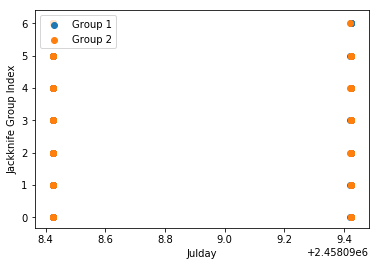

In [8]:
# Plot the time_avg_arrays of each jackknife pair
for y, jack_pair in enumerate(str_times):
    for i, jack in enumerate(jack_pair):
        times = np.unique(jack.time_avg_array)
        plt.scatter(times, y * np.ones(len(times)), color="C%i" % i)
plt.ylabel("Jackknife Group Index")
plt.xlabel("Julday")
patches = [plt.scatter([], [], color="C0"),
           plt.scatter([], [], color="C1")]
plt.legend(patches, ["Group 1", "Group 2"], loc=2)

In [9]:
# Split into Galactic Hour Angle bins
spl_gha = hs.jackknives.split_gha(uvp_list, bins_list=[10])

uvp 0 and 1 are concatable across blpairts axis


In [10]:
sp1 = spl_gha[0]
for i, u in enumerate(sp1):
    grp = u.labels
    print "Group %i gha: %s" % (i, grp)

Group 0 gha: [232.10924393]
Group 1 gha: [232.13031217]
Group 2 gha: [232.15141376]
Group 3 gha: [232.17254862]
Group 4 gha: [232.19371672]
Group 5 gha: [232.21491805]
Group 6 gha: [232.23615257]
Group 7 gha: [232.25742025]
Group 8 gha: [232.27872105]
Group 9 gha: [232.30005492]


In [11]:
# Omit antenna
omit_ants = hs.jackknives.omit_ants(uvp_list)

uvp 0 and 1 are concatable across blpairts axis


In [12]:
om1 = omit_ants[0]
for i, o in enumerate(om1):
    print "Group %i, Antenna Ommited: %s" % (i, o.labels[0])

Group 0, Antenna Ommited: 37
Group 1, Antenna Ommited: 38
Group 2, Antenna Ommited: 39
Group 3, Antenna Ommited: 51
Group 4, Antenna Ommited: 52
Group 5, Antenna Ommited: 53
Group 6, Antenna Ommited: 54
Group 7, Antenna Ommited: 67
Group 8, Antenna Ommited: 68
Group 9, Antenna Ommited: 69
